In [2]:
import pandas as pd
import sqlite3
from sqlite3 import connect
from sqlalchemy import create_engine
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px

In [5]:
con = sqlite3.connect('sentiment.db')
# need select word cloud from the day before
#df = pd.read_sql_query("SELECT * FROM nlp_analysis", con)

In [49]:
df.head()

,index,screen_name,text,retweeted,lang,time,new_date,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,0,Zed18978371,yup im crazy cryptotesla guy,0.0,en,8:48:31,2021-09-04,-0.600000,0.900000,negative,0.375,0.625,0.000,-0.3400
1,1,TeslaOwls,dont believe ever claimed tesla great build qu...,0.0,en,9:28:16,2021-09-04,0.427273,0.680909,positive,0.175,0.585,0.240,0.2960
2,2,vin_wiesel,media tesla crashes building autopilot,0.0,en,9:28:11,2021-09-04,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
3,3,Jeeeeee66023780,many followers,0.0,en,9:28:09,2021-09-04,0.500000,0.500000,neutral,0.000,1.000,0.000,0.0000
4,4,developrwannab,great thanks got add tesla bot thats kind deve...,0.0,en,9:28:53,2021-09-04,0.525000,0.712500,positive,0.000,0.423,0.577,0.9468


## Create a word cloud per day

In [50]:
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

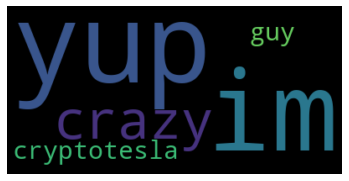

In [51]:
text = df.text[0]
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Cloud Saved Successfully


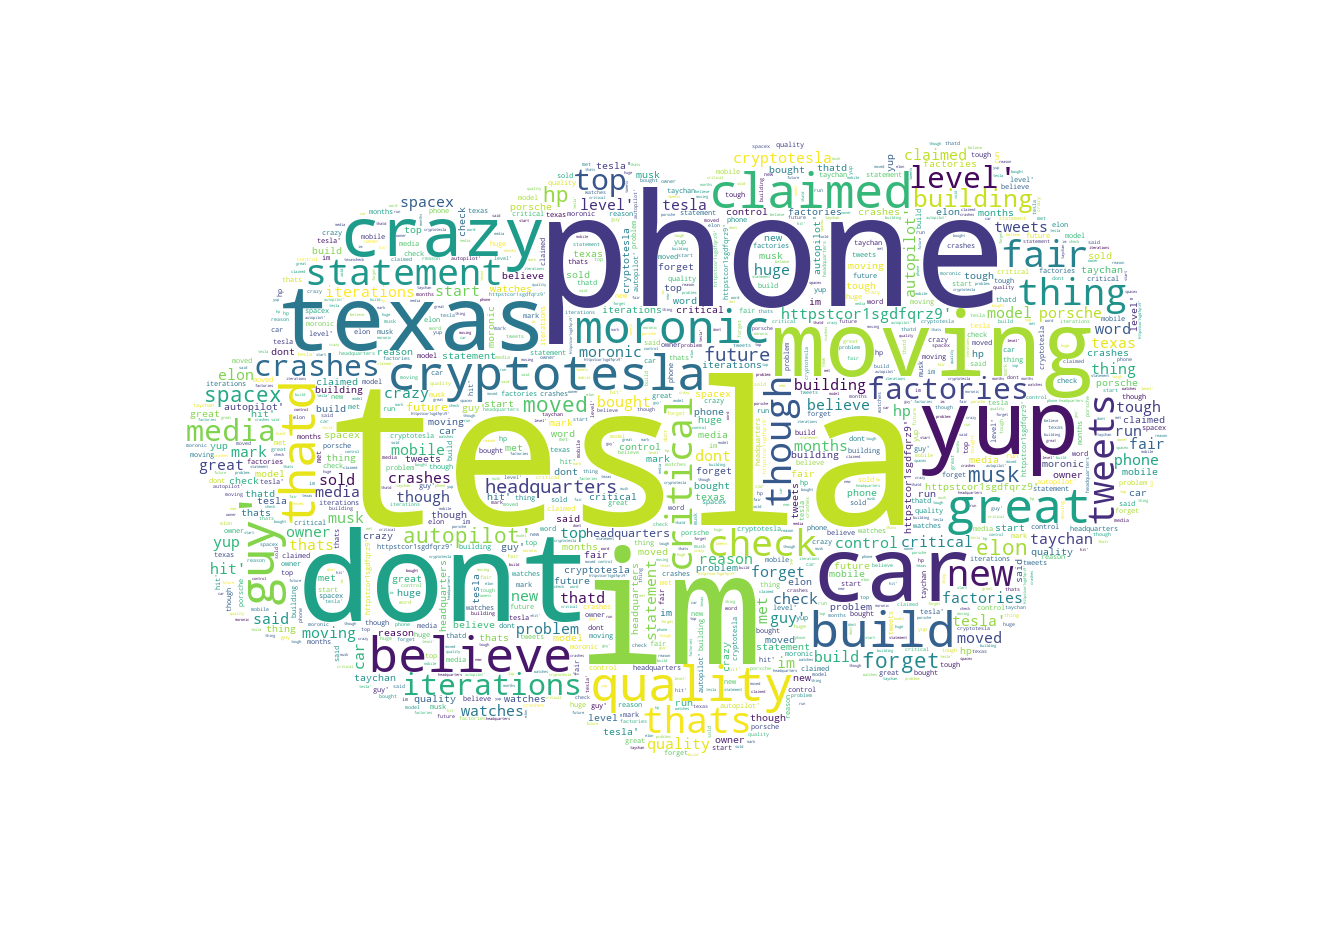

In [52]:
create_wordcloud(df["text"].values)

## Create a Sentiment Polarity per Day

In [53]:
fig = px.histogram(df, x = 'polarity')

'''df['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')'''

"df['polarity'].iplot(\n    kind='hist',\n    bins=50,\n    xTitle='polarity',\n    linecolor='black',\n    yTitle='count',\n    title='Sentiment Polarity Distribution')"

In [54]:
fig.show()

In [6]:
dftweets = pd.read_sql_query("SELECT * FROM nlp_analysis", con)   
dfstock = pd.read_sql_query("SELECT * FROM tsla_prices_cleaned", con) 

DatabaseError: Execution failed on sql 'SELECT * FROM nlp_analysis': no such table: nlp_analysis

In [69]:
dfstock.head()

,index,last,new_date,time
0,0,734.78,2021-09-03,09:00
1,1,731.61,2021-09-03,09:30
2,2,731.93,2021-09-03,10:00
3,3,730.00,2021-09-03,10:30
4,4,730.18,2021-09-03,11:00


In [70]:
dftweets

,index,screen_name,text,retweeted,lang,time,new_date,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,0,Zed18978371,yup im crazy cryptotesla guy,0.0,en,8:48:31,2021-09-04,-0.600000,0.900000,negative,0.375,0.625,0.000,-0.3400
1,1,TeslaOwls,dont believe ever claimed tesla great build qu...,0.0,en,9:28:16,2021-09-04,0.427273,0.680909,positive,0.175,0.585,0.240,0.2960
2,2,vin_wiesel,media tesla crashes building autopilot,0.0,en,9:28:11,2021-09-04,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
3,3,Jeeeeee66023780,many followers,0.0,en,9:28:09,2021-09-04,0.500000,0.500000,neutral,0.000,1.000,0.000,0.0000
4,4,developrwannab,great thanks got add tesla bot thats kind deve...,0.0,en,9:28:53,2021-09-04,0.525000,0.712500,positive,0.000,0.423,0.577,0.9468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54275,54275,Baz_k,already taken first tentative steps smart spea...,NaN,en,6:02:55,2021-09-02,0.119048,0.329365,positive,0.000,0.828,0.172,0.6124
54276,54276,Scobleizer,ai pioneer way ahead us hours night tesla lite...,NaN,en,6:02:41,2021-09-02,0.350000,0.550000,positive,0.000,0.847,0.153,0.4404
54277,54277,CAM1SEATTLE,dont forget elon musk moved spacex moving tesl...,NaN,en,6:02:32,2021-09-02,0.000000,0.125000,positive,0.000,0.900,0.100,0.1695
54278,54278,KingEtc1,tesla phone watches control tesla car tesla st...,NaN,en,6:02:19,2021-09-02,0.400000,0.900000,positive,0.000,0.874,0.126,0.3182


In [71]:
len(dftweets)

54280

In [72]:
dftweets_2 = dftweets[dftweets['new_date'].str.match('2021-09-05')]

In [73]:
dftweets_2

,index,screen_name,text,retweeted,lang,time,new_date,polarity,subjectivity,sentiment,neg,neu,pos,compound
10,10,future_yas,uncle rich made tesla bot hilarious episode bu...,0.0,en,6:48:38,2021-09-05,0.4375,0.875,positive,0.000,0.717,0.283,0.7430
11,11,thatdavemarsh,angle tesla doesnt repair procedures extent ty...,0.0,en,6:48:35,2021-09-05,0.5000,0.500,negative,0.168,0.681,0.152,-0.0772
12,12,future_yas,uncle rich made tesla bot hilarious episode bu...,0.0,en,6:48:38,2021-09-05,0.4375,0.875,positive,0.000,0.717,0.283,0.7430
13,13,thatdavemarsh,angle tesla doesnt repair procedures extent ty...,0.0,en,6:48:35,2021-09-05,0.5000,0.500,negative,0.168,0.681,0.152,-0.0772
14,14,Cristia99887080,choose tesla color,0.0,en,6:48:24,2021-09-05,0.0000,0.000,neutral,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18464,18464,JimWhit35636016,make wise decision moving head office texas ht...,NaN,en,0:00:30,2021-09-05,0.7000,0.900,positive,0.000,0.693,0.307,0.4767
18465,18465,effle,ironically ive taken supporters former guymaga...,NaN,en,0:00:28,2021-09-05,-0.0125,0.600,positive,0.248,0.451,0.301,0.3400
18466,18466,notAbot123450,much money credibility willing lose tesla,NaN,en,0:00:23,2021-09-05,0.2250,0.475,negative,0.351,0.649,0.000,-0.4019
18467,18467,Munchie291,dogecoin accepted tesla,NaN,en,0:00:12,2021-09-05,0.0000,0.000,positive,0.000,0.488,0.512,0.2732


In [63]:
len(dftweets_2)

11525

In [ ]:
dftweets_2['time'] = ''

In [64]:
dftweets_2 = dftweets_2.sort_values(by = ['time'])

In [65]:
dftweets_2

,index,screen_name,text,retweeted,lang,time,new_date,polarity,subjectivity,sentiment,neg,neu,pos,compound
15198,15198,TimesNow,report tesla worth 3000 share execute really w...,NaN,en,0:00:01,2021-09-05,0.250000,0.150000,positive,0.000,0.519,0.481,0.6697
9295,9295,Nicculus,11 nft auction close ending also get signed mo...,NaN,en,0:00:01,2021-09-05,0.600000,0.900000,positive,0.000,0.790,0.210,0.7324
15197,15197,DogecoinPilot,ok think new doge update creating lower fees i...,NaN,en,0:00:03,2021-09-05,0.318182,0.477273,positive,0.071,0.705,0.224,0.5859
15196,15196,xrgoldman,osu stats player tesla roadster automatically ...,NaN,en,0:00:04,2021-09-05,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
9294,9294,ChipedIn,two immediate applications 1 repetitive automo...,NaN,en,0:00:04,2021-09-05,-0.075000,0.275000,negative,0.100,0.900,0.000,-0.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9297,9297,The_Scenarist,untold story eddie torres aka paper boy build ...,NaN,en,9:59:35,2021-09-05,0.225000,0.266667,positive,0.000,0.914,0.086,0.4404
15201,15201,teslaP3D,4 wheels motor get b isnt really definition te...,NaN,en,9:59:38,2021-09-05,0.200000,0.200000,neutral,0.000,1.000,0.000,0.0000
9296,9296,BraydenSnook,maybe tesla prefect autodrive cars put hands y...,NaN,en,9:59:39,2021-09-05,0.100000,0.400000,neutral,0.000,1.000,0.000,0.0000
15200,15200,ArnoGlatz,tesla tsla congratulations httpstcombzbymdbdg,NaN,en,9:59:43,2021-09-05,0.000000,0.000000,positive,0.000,0.435,0.565,0.5994


In [75]:
dftweets_2 = dftweets_2.reset_index(drop=True).drop(columns = 'index')
dftweets_2


KeyError: "['index'] not found in axis"

In [77]:
dfstock[['avg_polarity',"num_of_tweets"]]=0
dfstock

,index,last,new_date,time,avg_polarity,num_of_tweets
0,0,734.780000,2021-09-03,09:00,0,0
1,1,731.610000,2021-09-03,09:30,0,0
2,2,731.930000,2021-09-03,10:00,0,0
3,3,730.000000,2021-09-03,10:30,0,0
4,4,730.180000,2021-09-03,11:00,0,0
5,5,727.650000,2021-09-03,11:30,0,0
6,6,728.110000,2021-09-03,12:30,0,0
7,7,730.090000,2021-09-03,13:00,0,0
8,8,728.640000,2021-09-03,13:30,0,0
9,9,726.440000,2021-09-03,14:00,0,0


In [78]:
dftweets_2.time.searchsorted('16:00%', side = 'right')

0

In [79]:
dftweets_2.compound[:2806].mean()

0.16947252316464725

In [80]:
for index, row in dfstock['time'].iteritems():
    if index == 0:
        num_tweets = dftweets_2.time.searchsorted(str(row)+'%', side = 'right')
        avg = dftweets_2.polarity[:num_tweets].mean()
        dfstock.loc[index, 'avg_polarity'] = avg
        dfstock.loc[index, 'num_of_tweets'] = num_tweets
        last_index = index
    else:
        new_num_tweets = dftweets_2.time.searchsorted(str(row)+'%', side = 'right')
        avg = dftweets_2.polarity[num_tweets:new_num_tweets].mean()
        dfstock.loc[index, 'avg_polarity'] = avg
        dfstock.loc[index, 'num_of_tweets'] = new_num_tweets-num_tweets
        num_tweets = new_num_tweets
dfstock

,index,last,new_date,time,avg_polarity,num_of_tweets
0,0,734.780000,2021-09-03,09:00,NaN,0
1,1,731.610000,2021-09-03,09:30,NaN,0
2,2,731.930000,2021-09-03,10:00,NaN,0
3,3,730.000000,2021-09-03,10:30,NaN,0
4,4,730.180000,2021-09-03,11:00,NaN,0
5,5,727.650000,2021-09-03,11:30,NaN,0
6,6,728.110000,2021-09-03,12:30,NaN,0
7,7,730.090000,2021-09-03,13:00,NaN,0
8,8,728.640000,2021-09-03,13:30,NaN,0
9,9,726.440000,2021-09-03,14:00,NaN,0


In [61]:
fig = px.line(dfstock, x = 'time', y = 'avg_polarity', title = 'avg polarity on 2021-09-03', 
             labels = {
                 'time': 'Time of Day (half hour)',
                 'avg_polarity': 'polarity',
             })
fig.show()

In [66]:
dfstock['time'] = str(dfstock['time'])

In [62]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [63]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

In [68]:
fig.add_trace(
    go.Scatter(x=dfstock['time'], y=dfstock['last'], name="yaxis data"),
    secondary_y=False,
)

In [89]:
from datetime import date, datetime
from pytz import timezone

con = sqlite3.connect('/Users/sean/labs/Capstone/TwitterStockAnalysis/sentiment.db')

    #df = pd.read_sql_query("SELECT * FROM spark_cleaned", con)
df = pd.read_sql_query("SELECT * FROM spark_cleaned limit 10", con)

df = df.rename(columns = {'date_time': 'date_time_est'})    
df = df.drop_duplicates()

eastern = timezone('US/Eastern')
utc = timezone('UTC')

for index, row in df['date_time_est'].iteritems():
        
        created_at = datetime.strptime(row[:-7], '%Y-%m-%d %H:%M:%S')
        utc_created_at = utc.localize(created_at)
        #print(utc_created_at)
        row = utc_created_at.astimezone(eastern)
        df.loc[index, 'date_time_est'] = str(row)
        #print(est_created_at)
        #print(type(row))
        
for index, row in df['date_time_est'].iteritems():
    #print(row[:10])
    # time is currently utc
        df.loc[index, 'time'] = row[11:19]
        df.loc[index, 'new_date'] = row[:10]
        df.head()
        

In [90]:
df

,index,screen_name,date_time_est,text,retweeted,lang,time,new_date
0,0,Zed18978371,2021-09-04 08:48:31-04:00,@NorristownN @RolandStautz Yup - I’m the crazy...,0,en,08:48:31,2021-09-04
1,1,TeslaOwls,2021-09-04 09:28:16-04:00,@EconomicManBlog @pauluaq1 @jrtolver16 @Tesla ...,0,en,09:28:16,2021-09-04
2,2,vin_wiesel,2021-09-04 09:28:11-04:00,@nuc_geek Media: “TESLA CRASHES INTO BUILDING ...,0,en,09:28:11,2021-09-04
3,3,Jeeeeee66023780,2021-09-04 09:28:09-04:00,@TeslaAIBot @Tesla Why you have so many follow...,0,en,09:28:09,2021-09-04
4,4,developrwannab,2021-09-04 09:28:53-04:00,@ukspacebulletin Great thanks. Now I got to ad...,0,en,09:28:53,2021-09-04
5,5,luke_deluxe,2021-09-04 09:28:44-04:00,@MMarboni @RARpartners @TechInsider @OOIDA Fin...,0,en,09:28:44,2021-09-04
6,6,developrwannab,2021-09-04 09:28:53-04:00,@ukspacebulletin Great thanks. Now I got to ad...,0,en,09:28:53,2021-09-04
7,7,luke_deluxe,2021-09-04 09:28:44-04:00,@MMarboni @RARpartners @TechInsider @OOIDA Fin...,0,en,09:28:44,2021-09-04
8,8,lordhyperkill,2021-09-04 10:52:30-04:00,@tylertootatted @TheSmokingTire That’s a real ...,0,en,10:52:30,2021-09-04
9,9,barryagall,2021-09-04 10:52:29-04:00,@jrtolver16 @Tesla White interior.,0,en,10:52:29,2021-09-04


In [91]:
print(df)

   index      screen_name              date_time_est  \
0      0      Zed18978371  2021-09-04 08:48:31-04:00   
1      1        TeslaOwls  2021-09-04 09:28:16-04:00   
2      2       vin_wiesel  2021-09-04 09:28:11-04:00   
3      3  Jeeeeee66023780  2021-09-04 09:28:09-04:00   
4      4   developrwannab  2021-09-04 09:28:53-04:00   
5      5      luke_deluxe  2021-09-04 09:28:44-04:00   
6      6   developrwannab  2021-09-04 09:28:53-04:00   
7      7      luke_deluxe  2021-09-04 09:28:44-04:00   
8      8    lordhyperkill  2021-09-04 10:52:30-04:00   
9      9       barryagall  2021-09-04 10:52:29-04:00   

                                                text  retweeted lang  \
0  @NorristownN @RolandStautz Yup - I’m the crazy...          0   en   
1  @EconomicManBlog @pauluaq1 @jrtolver16 @Tesla ...          0   en   
2  @nuc_geek Media: “TESLA CRASHES INTO BUILDING ...          0   en   
3  @TeslaAIBot @Tesla Why you have so many follow...          0   en   
4  @ukspacebulletin Gre